In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback

In [2]:
NUMBER_OF_FEATURES=3387

In [3]:
path_First_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/First_Sticker'


In [4]:
First_Sticker_BackgroundRFactivities = pd.read_csv(path_First_sticker+'/BackgroundRFactivities.csv')
First_Sticker_Connected = pd.read_csv(path_First_sticker+'/Connected.csv')
First_Sticker_Searching = pd.read_csv(path_First_sticker+'/Searching.csv')
First_Sticker_Searching_without_connected = pd.read_csv(path_First_sticker+'/Searching_without_connecting_to_app.csv')

In [5]:
First_Sticker_BackgroundRFactivities

,Version,0.3
0,0.000025,0.000023
1,-0.000040,-0.000075
2,-0.000016,-0.000007
3,0.000009,-0.000011
4,-0.000042,-0.000007
...,...,...
3386995,-0.000007,0.000034
3386996,-0.000015,0.000020
3386997,-0.000002,-0.000048
3386998,0.000058,-0.000040


In [6]:
# Renaming the Title of each coloum 

First_Sticker_BackgroundRFactivities=First_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Connected=First_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching=First_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching_without_connected=First_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(First_Sticker_BackgroundRFactivities))

<class 'pandas.core.frame.DataFrame'>


In [7]:
First_Sticker_BackgroundRFactivities

,I_Data,Q_Data
0,0.000025,0.000023
1,-0.000040,-0.000075
2,-0.000016,-0.000007
3,0.000009,-0.000011
4,-0.000042,-0.000007
...,...,...
3386995,-0.000007,0.000034
3386996,-0.000015,0.000020
3386997,-0.000002,-0.000048
3386998,0.000058,-0.000040


In [8]:
# converting Pandas to Numpy for easier plotting
First_Sticker_BackgroundRFactivities_numpy = First_Sticker_BackgroundRFactivities.to_numpy()
First_Sticker_Connected_numpy = First_Sticker_Connected.to_numpy()
First_Sticker_Searching_numpy = First_Sticker_Searching.to_numpy()
First_Sticker_Searching_without_connected_numpy = First_Sticker_Searching_without_connected.to_numpy()

In [9]:
I_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,1]

I_Data_First_BackgroundRFactivities= I_Data_First_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_BackgroundRFactivities= Q_Data_First_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_BackgroundRFactivities_2Dim = np.concatenate((I_Data_First_BackgroundRFactivities,Q_Data_First_BackgroundRFactivities),axis=1)


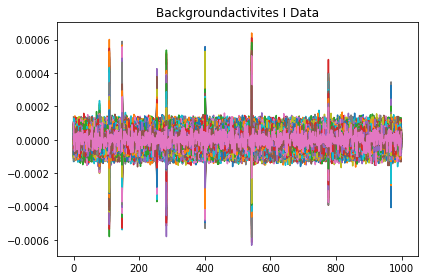

In [10]:
plt.plot(I_Data_First_BackgroundRFactivities)
plt.title("Backgroundactivites I Data")
plt.tight_layout()
plt.show()

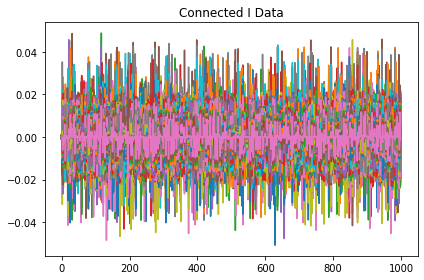

In [11]:
I_Data_First_Connected = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected = First_Sticker_Connected_numpy[0:,1]

I_Data_First_Connected= I_Data_First_Connected.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Connected= Q_Data_First_Connected.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Connected_2Dim = np.concatenate((I_Data_First_Connected,Q_Data_First_Connected),axis=1)

plt.plot(I_Data_First_Connected[0:])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

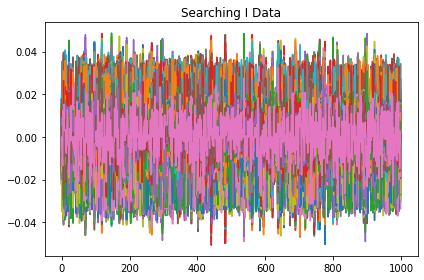

In [12]:
I_Data_First_Searching = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching = First_Sticker_Searching_numpy[0:,1]

I_Data_First_Searching= I_Data_First_Searching.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Searching= Q_Data_First_Searching.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_2Dim = np.concatenate((I_Data_First_Searching,Q_Data_First_Searching),axis=1)


plt.plot(I_Data_First_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

In [13]:
I_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,1]

I_Data_First_Searching_WIFI_established= I_Data_First_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Searching_WIFI_established= Q_Data_First_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_WIFI_established_2Dim = np.concatenate((I_Data_First_Searching_WIFI_established,Q_Data_First_Searching_WIFI_established),axis=1)


In [14]:
Concatenate_IQ_First_Searching_WIFI_established_2Dim.shape

(1000, 6774)

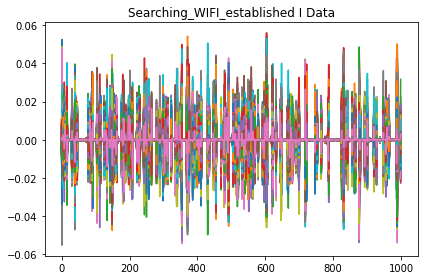

In [15]:
plt.plot(I_Data_First_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established I Data")
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import RobustScaler,StandardScaler

scaler_backgroundRFactivites = StandardScaler()
scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(Concatenate_IQ_First_BackgroundRFactivities_2Dim)
IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_BackgroundRFactivities_2Dim)

scaler_connected = StandardScaler()
scaler_connected_scaled = scaler_connected.fit(Concatenate_IQ_First_Connected_2Dim)
IQ_connected_numpy_scaled= scaler_connected_scaled.transform(Concatenate_IQ_First_Connected_2Dim)


scaler_searching = StandardScaler()
scaler_searching_scaled = scaler_searching.fit(Concatenate_IQ_First_Searching_2Dim)
IQ_searching_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_Searching_2Dim)

scaler_searching_WIFI_established = StandardScaler()
scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(Concatenate_IQ_First_Searching_WIFI_established_2Dim)
IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(Concatenate_IQ_First_Searching_WIFI_established_2Dim)

In [17]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [18]:
np.random.seed(2016)

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)


[[ 0.59893691 -1.06475573 -0.40794592 ...  0.          0.
   0.        ]
 [ 0.89886298  1.34042539  0.34610655 ...  0.          0.
   0.        ]
 [-0.13460742  0.60914002 -1.46416284 ...  0.          0.
   0.        ]
 [-0.45460088  0.09103575  0.84446051 ...  0.          0.
   0.        ]
 [ 1.3457691  -0.26267516 -0.75684803 ...  0.          0.
   0.        ]]


[[0.05599012 0.08026211 0.06901589 ... 1.         0.         0.        ]
 [0.05710296 0.0850682  0.10446759 ... 1.         0.         0.        ]
 [0.07473122 0.09638179 0.06747081 ... 1.         0.         0.        ]
 [0.07727248 0.08003408 0.10186407 ... 1.         0.         0.        ]
 [0.06700224 0.09766225 0.11909112 ... 1.         0.         0.        ]]


[[-0.65256293 -0.65668895  1.05641039 ...  0.          1.
   0.        ]
 [-0.83235587  0.01467237 -2.5720

In [19]:
import copy

stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

In [20]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932
print(length_of_X_validation)

3600


In [21]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:6774]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,6774:]
print(Y_Train_Dataset)

(2800, 6774)
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [22]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:6774]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,6774:]
print(Validation_Dataset.shape)

(800, 6774)


In [23]:
Train_Dataset=Train_Dataset.reshape(2800,6774,1)
Validation_Dataset=Validation_Dataset.reshape(800,6774,1)
print(Validation_Dataset.shape)

(800, 6774, 1)


In [1]:
  
import keras
import keras.models as models
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, Conv1D, MaxPooling1D
from keras.layers.core import Flatten, Dense, Dropout, Activation, Reshape

def getBaselineModel(slice_size, classes=4, cnn_stacks=3, fc_stacks=1, channels=128, dropout_flag=True, \
                        fc1=256, fc2=128, batchnorm=False, \
                        #optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), \
                        loss='categorical_crossentropy'):
    """A dummy model to test the functionalities of the Data Generator"""
    model = models.Sequential()
    model.add(Conv1D(channels,7,activation='relu', padding='same', input_shape=(slice_size, 1)))
    model.add(Conv1D(channels,5, padding='same'))
    if batchnorm:
        model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_1'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D())
    for i in range(1, cnn_stacks):
        model.add(Conv1D(channels,7,activation='relu', padding='same'))
        model.add(Conv1D(channels,5, padding='same'))
        if batchnorm:
            model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_'+str(i+1)))
        model.add(Activation('relu'))
        model.add(MaxPooling1D())
    #model.add(Conv1D(128,7,activation='relu', padding='same'))
    #model.add(Conv1D(128,5,activation='relu', padding='same'))
    #model.add(MaxPooling1D())
    model.add(Flatten())
    for j in range(1, fc_stacks):
        model.add(Dense(fc1, activation='relu'))
        if dropout_flag:
            model.add(Dropout(0.5))
    model.add(Dense(fc2, activation='relu'))
    if dropout_flag:
        model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))

    #optimizer = optimizer
    #optimizer = Adam(lr=lr, beta_1=beta_2, beta_2=beta_2, epsilon=epsilon, decay=decay, amsgrad=amsgrad)
    #model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [2]:
model_1223 = getBaselineModel(slice_size=6774)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6774, 128)         1024      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6774, 128)         82048     
_________________________________________________________________
activation (Activation)      (None, 6774, 128)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3387, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3387, 128)         114816    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3387, 128)         82048     
_________________________________________________________________
activation_1 (Activation)    (None, 3387, 128)         0

In [27]:
model_1223.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history3 = model_1223.fit(Train_Dataset, Y_Train_Dataset, epochs=6000, batch_size=100,validation_data=(Validation_Dataset, Y_Validation_Dataset),
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/6000
28/28 [==============================] - 9s 304ms/step - loss: 1.2083 - accuracy: 0.5200 - val_loss: 0.8971 - val_accuracy: 0.9237
Epoch 2/6000
28/28 [==============================] - 8s 301ms/step - loss: 0.6139 - accuracy: 0.8764 - val_loss: 0.2828 - val_accuracy: 0.9400
Epoch 3/6000
28/28 [==============================] - 8s 302ms/step - loss: 0.1627 - accuracy: 0.9682 - val_loss: 0.0500 - val_accuracy: 0.9925
Epoch 4/6000
28/28 [==============================] - 9s 304ms/step - loss: 0.0612 - accuracy: 0.9882 - val_loss: 0.0262 - val_accuracy: 0.9962
Epoch 5/6000
28/28 [==============================] - 9s 305ms/step - loss: 0.0482 - accuracy: 0.9907 - val_loss: 0.0343 - val_accuracy: 0.9975
Epoch 6/6000
28/28 [==============================] - 9s 306ms/step - loss: 0.0296 - accuracy: 0.9939 - val_loss: 0.0165 - val_accuracy: 0.9987
Epoch 7/6000
28/28 [==============================] - 9s 307ms/step - loss: 0.0204 - accuracy: 0.9957 - val_loss: 0.0254 - val_accuracy:

In [29]:
_, accuracy_test = model_1223.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy_test*100))

25/25 [==============================] - 1s 34ms/step - loss: 0.0087 - accuracy: 0.9987
Accuracy: 99.87


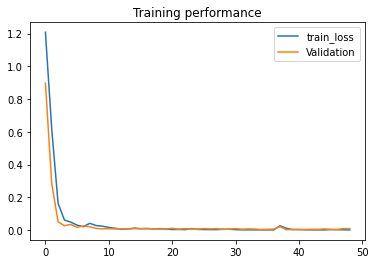

In [30]:
plt.figure()
plt.title('Training performance')
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [31]:
#model_1223.save("{MODEL RFMLS} First_Sticker_TRAINED")
model_1223.save("{MODEL First RFMLS} First_Sticker_TRAINED")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {MODEL First RFMLS} First_Sticker_TRAINED/assets


# First Attempt Trained Model

### Using First Model as Trained Model

In [28]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{MODEL RFMLS} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 32ms/step - loss: 0.0206 - accuracy: 0.9925
99.25000071525574


### Using Third Model as Trained Model

In [27]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("{MODEL RFMLS} Third_Sticker_TRAINED")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 32ms/step - loss: 51.1104 - accuracy: 0.7225
72.25000262260437


### Using Fourth Model as Trained Model

In [26]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("{MODEL RFMLS} Fourth_Sticker_TRAINED")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 32ms/step - loss: 9.5745 - accuracy: 0.7337
73.37499856948853


### Using Fifth Model as Trained Model

In [25]:
from tensorflow import keras
load_fifth_sticker_model = keras.models.load_model("{MODEL RFMLS} Fifth_Sticker_TRAINED")
_,accuracy=load_fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 32ms/step - loss: 12.3607 - accuracy: 0.7225
72.25000262260437


# Second Attempt Trained Model

### Using First Sticker Model as Trained Model

In [37]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 32ms/step - loss: 1.3720 - accuracy: 0.7638
76.37500166893005


### Using Second Sticker Model as Trained Model

In [38]:
from tensorflow import keras
load_Second_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Second_Sticker_TRAINED")
_,accuracy=load_Second_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 34ms/step - loss: 3.4482 - accuracy: 0.7325
73.25000166893005


### Using Third Sticker Model as Trained Model

In [39]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Third_Sticker_TRAINED")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 34ms/step - loss: 6.4476 - accuracy: 0.7575
75.74999928474426


### Using Fourth Sticker Model as Trained Model

In [40]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Fourth_Sticker_TRAINED")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 34ms/step - loss: 9.9740 - accuracy: 0.7563
75.62500238418579


### Using Fifth Sticker Model as Trained Model

In [41]:
from tensorflow import keras
load_fifth_sticker_model = keras.models.load_model("../../Second Dataset collected on 16 December 2020/Pre-processed file/{MODEL Second RFMLS} Fifth_Sticker_TRAINED")
_,accuracy=load_fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

25/25 [==============================] - 1s 34ms/step - loss: 7.3407 - accuracy: 0.7513
75.12500286102295
